# Data exploration 

Load the high level feature arrays into an x and a y variable:

In [1]:
import numpy as np

In [2]:
with np.load('train.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    x_train = npz_file['features']
    y_train = npz_file['targets']

In [3]:
with np.load('valid.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    x_valid = npz_file['features']
    y_valid = npz_file['targets']

In [4]:
with np.load('test.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    x_test = npz_file['features']
    y_test = npz_file['targets']

-----

Plot a few images from each category:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import PIL.Image as Image

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
test_generator = ImageDataGenerator(rescale=1/255)

In [8]:
testset = test_generator.flow_from_directory(
     'test', batch_size=3, target_size=(224, 224))

Found 50 images belonging to 6 classes.


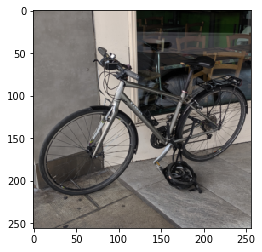

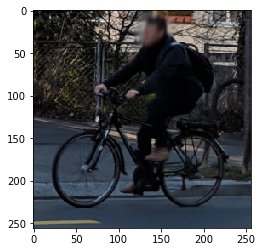

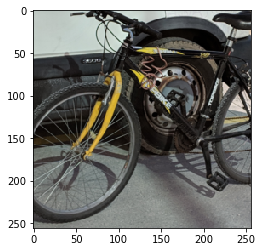

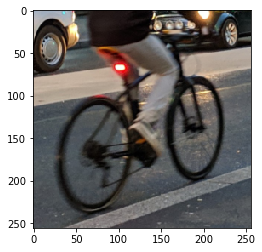

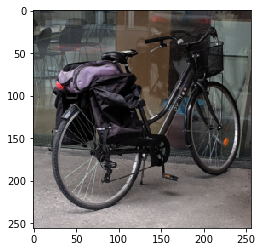

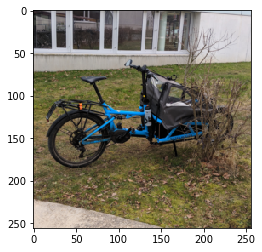

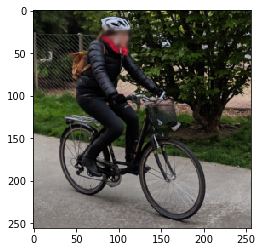

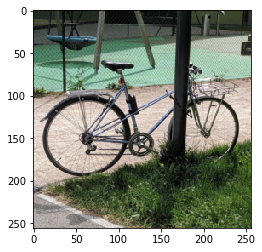

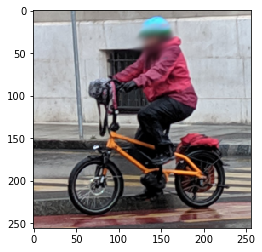

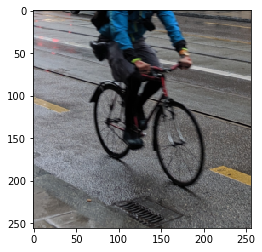

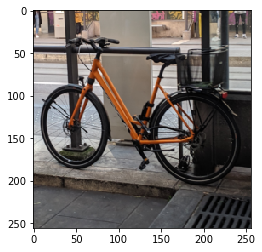

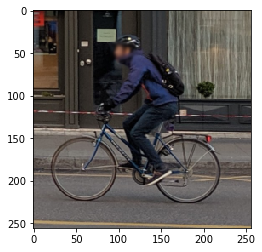

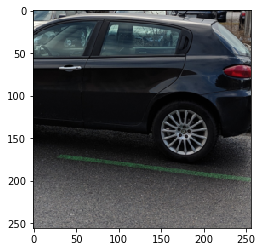

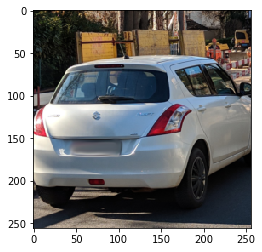

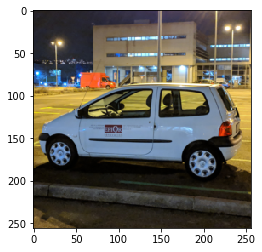

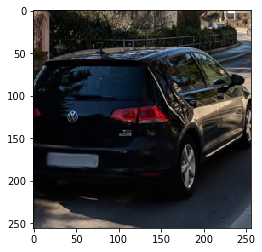

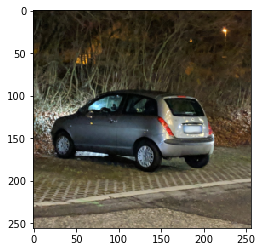

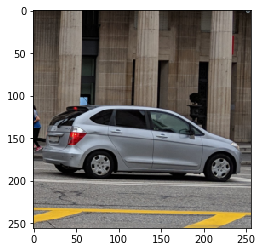

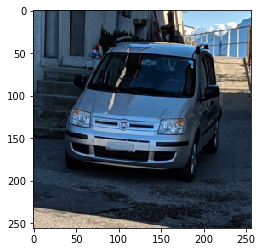

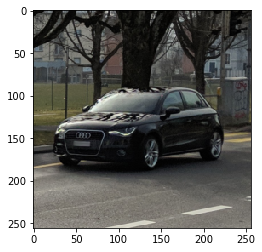

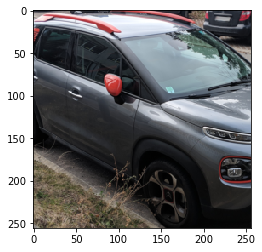

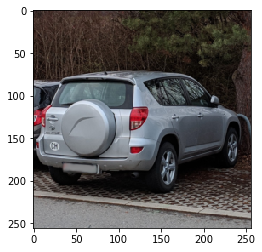

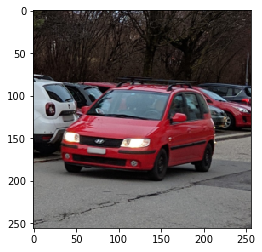

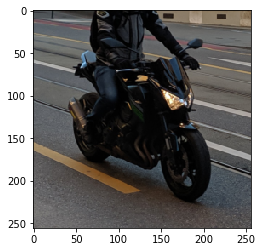

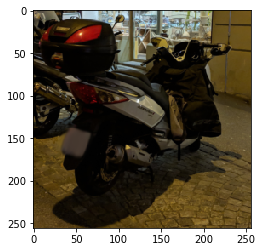

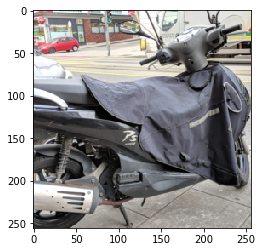

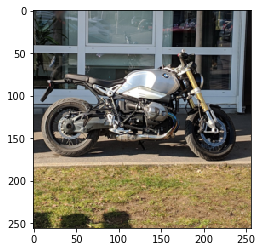

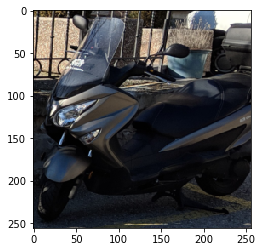

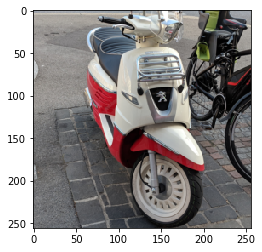

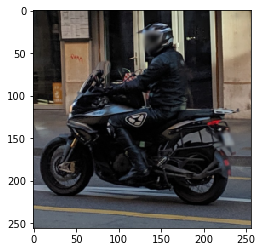

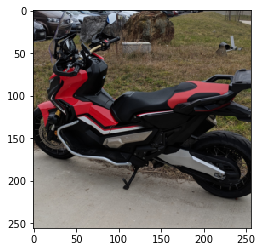

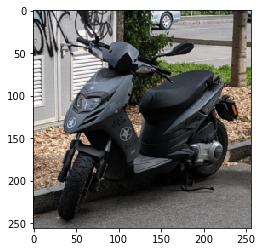

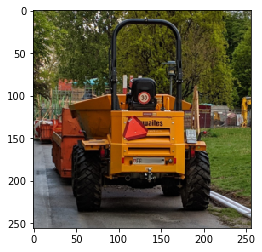

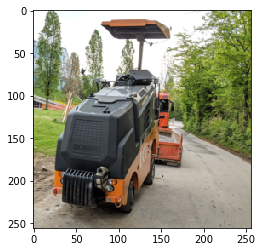

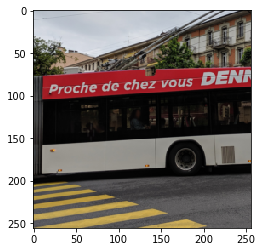

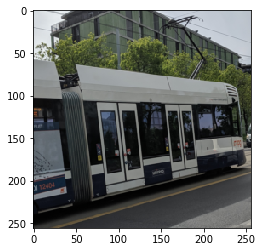

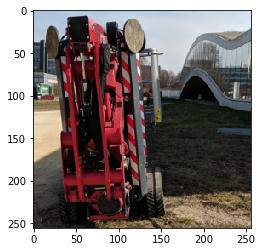

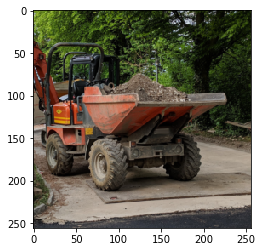

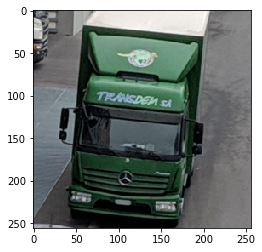

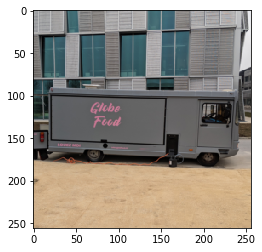

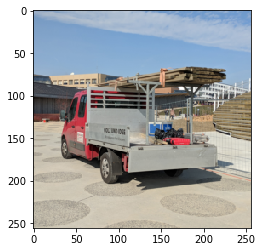

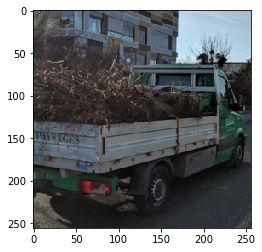

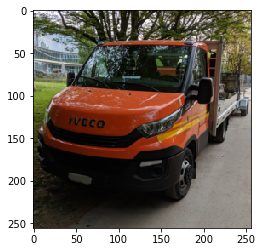

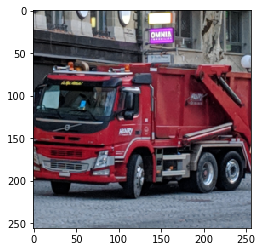

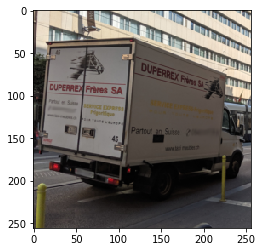

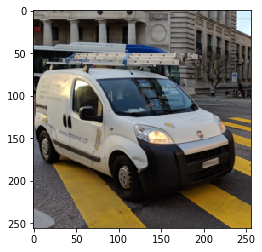

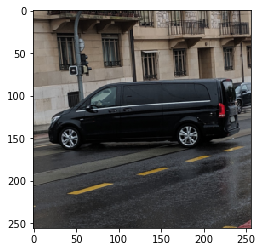

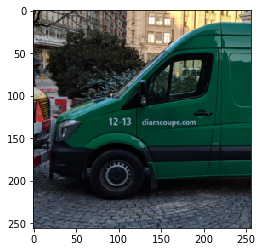

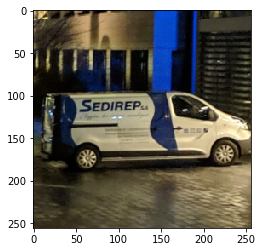

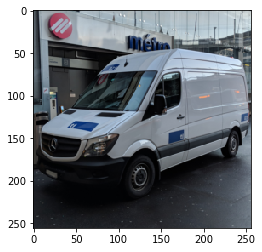

In [9]:
for i in range(50):
    img = Image.open('test\\' + testset.filenames[i])
    img_resized = img.resize([224, 224], resample=Image.BILINEAR) # Expected size
    img_batch = np.array(img_resized, dtype=np.float32)[np.newaxis, :, :, :]/255


    plt.imshow(img)
    plt.show()

-----

Use all data, not just train images!

In [10]:
X = np.concatenate((x_train, x_valid, x_test), axis=0)

In [11]:
X.shape

(469, 1280)

In [12]:
y = np.concatenate((y_train, y_valid, y_test), axis=0)

In [13]:
y.shape

(469,)

Make a scree plot, how many PCA components explain 10%, 20%, …, 90% and 100% of the variance?

In [14]:
from sklearn.decomposition import PCA

In [15]:
# Create PCA transformer
pca_1 = PCA(n_components=None)

# Apply PCA to rescaled data
pca_1.fit(X)

# Proportion of variance explained
pve = pca_1.explained_variance_ratio_
pve

array([1.35031223e-01, 7.30676726e-02, 6.69480041e-02, 3.08912229e-02,
       2.34896783e-02, 2.05676015e-02, 1.81591753e-02, 1.80826634e-02,
       1.53433625e-02, 1.30470116e-02, 1.29471840e-02, 1.19804814e-02,
       1.08439829e-02, 1.03042424e-02, 9.89651307e-03, 9.28496942e-03,
       8.98921490e-03, 8.56197160e-03, 8.14847276e-03, 7.91309774e-03,
       7.74365291e-03, 7.35420035e-03, 6.88780937e-03, 6.81140414e-03,
       6.25533471e-03, 6.12616399e-03, 6.03500567e-03, 5.92892617e-03,
       5.84062701e-03, 5.75447828e-03, 5.49678784e-03, 5.35319047e-03,
       5.31360693e-03, 5.00091026e-03, 4.91776504e-03, 4.84571047e-03,
       4.79176780e-03, 4.60546417e-03, 4.46538348e-03, 4.44818940e-03,
       4.32098052e-03, 4.17142035e-03, 4.12348518e-03, 4.01202776e-03,
       3.94104468e-03, 3.91523447e-03, 3.86731513e-03, 3.73062771e-03,
       3.69565957e-03, 3.65375192e-03, 3.58463894e-03, 3.53959459e-03,
       3.47333448e-03, 3.36733391e-03, 3.31782759e-03, 3.24651063e-03,
      

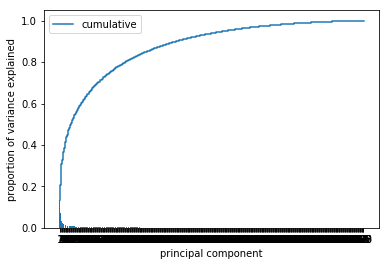

In [16]:
# Create bar plot
fig = plt.figure()
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)  
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

In [17]:
pca_1.components_.shape

(469, 1280)

In [18]:
count = []

for i in np.arange(0.1, 1.01, 0.1):
    counts = np.count_nonzero(pve_cumsum[pve_cumsum<i])
    count.append(counts)

In [19]:
d = {'% of variance explained (<)': np.arange(0.1, 1.01, 0.1), 'Number of components': count}

In [20]:
import pandas as pd
pd.DataFrame(d)

% of variance explained (<)  Number of components
0                          0.1                     0
1                          0.2                     1
2                          0.3                     3
3                          0.4                     8
4                          0.5                    18
5                          0.6                    34
6                          0.7                    60
7                          0.8                   102
8                          0.9                   180
9                          1.0                   467

Overall we can see that cumulative explained variance is exponentially increasing, i.e. a small amount of principal components are required to keep a high proportion of the information contained in our data. For example only three components are required for 30% of total information.

---

Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?

In [21]:
# Create PCA transformer
pca_2 = PCA(n_components=2)

# Apply PCA
pca_2.fit(X, y=None); # Unsupervised learning, no y variable

In [22]:
X_2d = pca_2.transform(X)

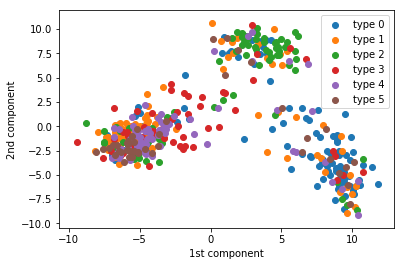

In [23]:
for kind in [0, 1, 2, 3, 4, 5]:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(kind)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [24]:
pca_2.explained_variance_ratio_

array([0.13503118, 0.07306765], dtype=float32)

**Findings:** The top 2 "principal components"/ new features are a combination of the original 1280 features. In addition 13% of the total variance is contained in the first principal component and 7% in the second one. In that sense, the plot from above shows 20% of the total information. Usually we will standardize the data at this point in order to avoid the algorithm favouring variables with a large variance. However the data has already been standardized during the feature extraction process.

Indeed PCA was able to learn by itself some higher level information of all features, i.e. different types of vehicles. The overlaps are not counter-intuitive because some type of vehicles are similar in their shape (e.g. type 0 'bike' and type 2 'motorcycle'). 

Finally according to the dataframe below the components capturing most of the variance are rather perpendicular to the axis.

In [25]:

# Create DataFrame with variance and principal components
results_df = pd.DataFrame({
    'variance': X.var(axis=0),
    '1st component': pca_2.components_[0],
    '2nd component': pca_2.components_[1]
})

# Sort DataFrame by variance
results_df.sort_values('variance', ascending=False)

variance  1st component  2nd component
165   1.221587      -0.058857      -0.049100
54    0.994471       0.118507      -0.093709
1094  0.947441       0.096744      -0.087186
672   0.886458       0.117223      -0.052861
1142  0.859557       0.026726      -0.020593
148   0.816960       0.112300      -0.091707
363   0.804326       0.079718       0.047932
898   0.774854      -0.009271       0.130408
1120  0.773320       0.030705       0.082375
257   0.748337      -0.086989       0.019706
466   0.743809      -0.108288      -0.051778
856   0.743623      -0.053388       0.053719
183   0.738677       0.024182      -0.103354
660   0.728698      -0.088214       0.009948
1104  0.711352      -0.066549      -0.015753
261   0.710379      -0.030274       0.004767
1199  0.690391       0.094306      -0.079482
999   0.687496       0.097097      -0.085798
1022  0.684585      -0.066607      -0.042533
801   0.684068       0.095224      -0.064545
59    0.675366      -0.023300       0.018883
268   0.672523       0.053733      -0.079195
1218  0.670977      -0.025644       0.067712
1089  0.670005       0.068205      -0.090008
486   0.665731       0.033886      -0.077092
1234  0.656002       0.104800       0.006130
799   0.653034       0.048232       0.022714
699   0.649446      -0.018106       0.090080
1240  0.646691      -0.012438      -0.098757
893   0.646481      -0.057862       0.000622
...        ...            ...            ...
1229  0.017675       0.002863       0.002337
465   0.017197       0.000152       0.001221
648   0.016940       0.000787       0.000002
1056  0.016497      -0.001936       0.000677
311   0.016208       0.001599       0.001158
398   0.016147      -0.003171       0.002730
1209  0.015869      -0.001852      -0.000959
331   0.015850      -0.003145       0.000049
1047  0.015783      -0.003721       0.000866
63    0.015769      -0.001543      -0.001116
46    0.015554       0.000474      -0.000827
498   0.014928       0.005505      -0.003473
854   0.014336       0.000795       0.000312
1084  0.014104      -0.000873      -0.002759
197   0.013771      -0.002137      -0.000060
665   0.013576      -0.003544      -0.001447
369   0.013485       0.001467       0.005841
563   0.011990      -0.001006       0.002251
235   0.011889       0.001800      -0.000147
581   0.011705       0.003062      -0.000153
828   0.011656      -0.000034      -0.001968
862   0.011024       0.001478      -0.000136
480   0.010273      -0.000881      -0.001248
834   0.009748       0.002598      -0.000398
297   0.009407      -0.002807      -0.001199
9     0.008095      -0.000546       0.001632
1175  0.007064      -0.000807       0.000080
358   0.006827       0.002615      -0.001286
99    0.004082       0.000629       0.001699
325   0.000964       0.000562       0.000089

[1280 rows x 3 columns]